Trabajar como analista para la empresa de taxis Zuber es un rol muy importante debido que se necesita recopilar cierta información para la toma de decisiones en la compañia. La empresa ofrece a sus clientes viajes por toda la ciudad de Chicago. El departamento comercial necesita encontrar patrones en la información disponible. Quiere comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

A continuación se va a realizar un análisis preliminar de los datos basado en una selección de taxis y viajes relativamente pequeña. Hay tres tablas que contiene información sobre Zuber: quiénes son las empresas de taxis, promedio de viajes, que lugares recorren más, así como la cantidad de tiempo que hacen para recorrer cierto lugar. El trabajo es analizar los datos de los competidores y probar una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

# Paso 4. Análisis exploratorio de datos

In [1]:
# Cargar todas las librerías
import pandas as pd
import plotly.express as px
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from scipy import stats as st
from scipy.stats import ttest_ind

In [2]:
# Carga de archivo de datos en el DataFrames
df_sql_1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df_sql_4 = pd.read_csv('/datasets/project_sql_result_04.csv')
df_sql_7 = pd.read_csv('/datasets/project_sql_result_07.csv')

# `project_sql_result_01` DataFrame

In [3]:
# Imprime la información general/resumida sobre el DataFrame project_sql_result_01
df_sql_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
# Imprime una muestra de los datos para project_sql_result_01
df_sql_1.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
# Imprime la descripción general/resumida sobre el DataFrame project_sql_result_01
df_sql_1.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


Con respecto el project_sql_result_01 DataFrame contiene información sobre la compañia de taxis y la cantidad de viajes que realiza, también, dontiene inoformación sobre dtypes: int64(1), object(1) y se puede observar la descripción de la tabla con la finalidad de enriquecer mas los datos.

# `project_sql_result_04` DataFrame

In [6]:
# Imprime la información general/resumida sobre el DataFrame project_sql_result_04
df_sql_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [7]:
# Imprime una muestra de los datos para project_sql_result_04
df_sql_4.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [8]:
# Imprime la descripción general/resumida sobre el DataFrame project_sql_result_04
df_sql_4.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Con respecto al project_sql_result_04 DataFrame se encuentra la información general/resumida con dtypes: float64(1), object(1) la tabla contiene información sobre los barrios o ubicaciones y el promedio de viajes que se han efectuado.

# `project_sql_result_07` DataFrame

In [9]:
# Imprime la información general/resumida sobre el DataFrame project_sql_result_07
df_sql_7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [10]:
# Imprime una muestra de los datos project_sql_result_07
df_sql_7.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [11]:
#Transformar 'start_ts' a datetime
df_sql_7['start_ts'] = pd.to_datetime(df_sql_7['start_ts'])
df_sql_7

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [12]:
# Imprime la descripción general/resumida sobre el DataFrame project_sql_result_07
df_sql_7.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


Para el project_sql_result_07 DataFrame se muestra la información general/resumida y dicha tabla cuenta con 3 columnas con información sobre la fecha y hora de inicio de viaje, condiciones climáticas y duración del viaje en segundos. La tabla cotiene dtypes: float64(1), object(2), en este caso 'start_ts' es transformado a datetime con la finalidad de enriquecer más los datos.

Identificar los 10 principales barrios en términos de finalización del recorrido

In [13]:
#Top 10 de los principales barrios, haciendo uso de una tabla dinámica.
top10_barrios = df_sql_4.pivot_table(index= 'dropoff_location_name', values= 'average_trips', aggfunc= 'sum')
top10_barrios.sort_values(by= 'average_trips', ascending= False).head(10)

,average_trips
dropoff_location_name,
Loop,10727.466667
River North,9523.666667
Streeterville,6664.666667
West Loop,5163.666667
O'Hare,2546.900000
Lake View,2420.966667
Grant Park,2068.533333
Museum Campus,1510.000000
Gold Coast,1364.233333


In [14]:
list_barrios = ('Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast', 'Sheffield & DePaul')
df_barrios = df_sql_4[df_sql_4['dropoff_location_name'].isin(list_barrios)]

In [15]:
dist_barrios = df_barrios.groupby(['dropoff_location_name'])['average_trips'].sum().reset_index()
dist_barrios

,dropoff_location_name,average_trips
0,Gold Coast,1364.233333
1,Grant Park,2068.533333
2,Lake View,2420.966667
3,Loop,10727.466667
4,Museum Campus,1510.000000
5,O'Hare,2546.900000
6,River North,9523.666667
7,Sheffield & DePaul,1259.766667
8,Streeterville,6664.666667
9,West Loop,5163.666667


Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones.

In [16]:
#Uso de una tabla dinámica.
company_taxi = df_sql_1.pivot_table(index= 'company_name', values= 'trips_amount', aggfunc= 'sum')
company_taxi.sort_values(by= 'trips_amount', ascending= False).head(10)

,trips_amount
company_name,
Flash Cab,19558
Taxi Affiliation Services,11422
Medallion Leasing,10367
Yellow Cab,9888
Taxi Affiliation Service Yellow,9299
Chicago Carriage Cab Corp,9181
City Service,8448
Sun Taxi,7701
Star North Management LLC,7455


In [17]:
list_taxi = ('Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing', 'Yellow Cab', 'Taxi Affiliation Service Yellow','Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi', 'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.')
df_taxi = df_sql_1[df_sql_1['company_name'].isin(list_taxi)]

In [18]:
dist_taxi = df_taxi.groupby(['company_name'])['trips_amount'].sum().reset_index()
dist_taxi

,company_name,trips_amount
0,Blue Ribbon Taxi Association Inc.,5953
1,Chicago Carriage Cab Corp,9181
2,City Service,8448
3,Flash Cab,19558
4,Medallion Leasing,10367
5,Star North Management LLC,7455
6,Sun Taxi,7701
7,Taxi Affiliation Service Yellow,9299
8,Taxi Affiliation Services,11422
9,Yellow Cab,9888


In [19]:
#df_merged= pd.merge(df_barrios, df_taxi, left_on=None, right_on=None, left_index=True, right_index=True)
#df_merged

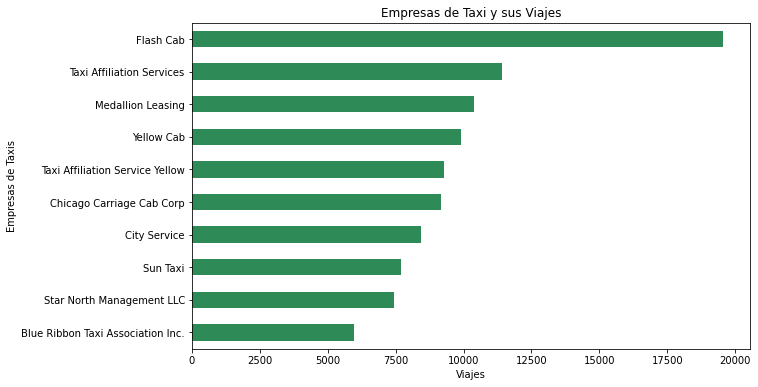

In [20]:
#Gráfica de Taxis y su recorridos
taxis = dist_taxi.groupby('company_name')['trips_amount'].sum().sort_values().head(10)
taxis.plot(kind= 'barh', x= 'company_name', y= 'trips_amount', figsize=(10, 6), color='seagreen')
plt.title('Empresas de Taxi y sus Viajes')
plt.ylabel('Empresas de Taxis')
plt.xlabel('Viajes')

plt.show()

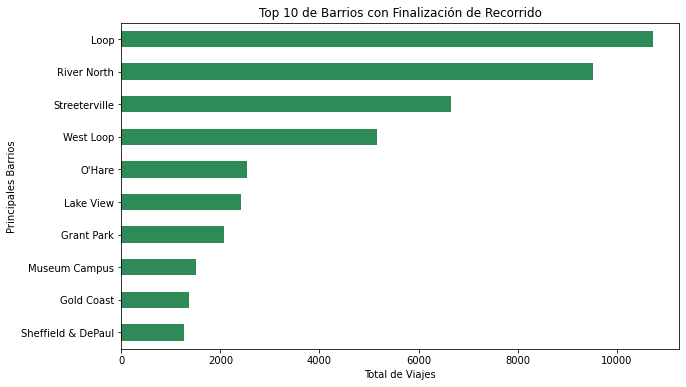

In [21]:
#Gráfica de los 10 Barrios con finalización de recorridos
top_barrios = dist_barrios.groupby('dropoff_location_name')['average_trips'].sum().sort_values()
top_barrios.plot(kind= 'barh', x= 'dropoff_location_name', y= 'average_trips', figsize=(10, 6), color='seagreen')
plt.title('Top 10 de Barrios con Finalización de Recorrido')
plt.ylabel('Principales Barrios')
plt.xlabel('Total de Viajes')

plt.show()

Sacar conclusiones basadas en cada gráfico y explicar los resultados

1. Con base a la información analizada de la gráfica número uno que hace referencia a las empresas de taxis y sus viajes, se puede concluir que que la empresa de taxi "Flas Cab" es la que lidera la preferencia por parte de los usuarios, luego le siguen las otras empresas que comparten casi el mismo promedio de preferencia en el top 10 de empresas.


2. Con respecto a los datos obtenidos de la gráfica numero dos que hace referencia a los 10 principales barrios en términos de finalización del recorrido, se puede ver que existen dos barrios que lideran el punto de ubicación siendo estos: "Loop" y "River North" que normalmente finalizan el corrido segun la ruta trazada por los usuarios y el resto de ubicaciones o barrios comparte ciertos recorridos como se observa se observa en la grpafica del Top 10 de barrios .

# Paso 5. Prueba de hipótesis 

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

# Hipotesis No.1

Formulación de hipótesis NULA y ALTERNATIVA

Ho: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son las mismas los sábados lluviosos".


H1: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son distintas los sábados lluviosos".

In [22]:
df_sql_7.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [23]:
#Valores unicos de condiciones climaticas
df_sql_7.weather_conditions.sort_values().unique()

array(['Bad', 'Good'], dtype=object)

In [24]:
#Condiciones climaticas malas
bad_weather = df_sql_7.query('weather_conditions == "Bad"')
bad_weather

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [25]:
#Condiciones climaticas buenas
good_weather = df_sql_7.query('weather_conditions == "Good"')
good_weather

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [26]:
#Formulación de Hipótesis
good = good_weather['duration_seconds'].dropna()
bad = bad_weather['duration_seconds'].dropna()


In [27]:
alpha = 0.05
stat, p_value = ttest_ind(good, bad)
print(f"""
La duración promedio de los viajes para Good Weather es: {good.mean()}
La duración promedio de los viajes para Bad Weather es: {bad.mean()}
          
          t-statistic: {stat}
          p-value: {p_value}
""")

if p_value < alpha:
    print('Se rechaza la hipótesis nula')
else:
    print('No se rechaza la hipótesis nula')


La duración promedio de los viajes para Good Weather es: 1999.6756756756756
La duración promedio de los viajes para Bad Weather es: 2427.2055555555557
          
          t-statistic: -6.946177714041499
          p-value: 6.517970327099473e-12

Se rechaza la hipótesis nula


Establece el valor del nivel de significación (alfa) por tu cuenta.

Explica:

Cómo planteaste las hipótesis nula y alternativa


Para la formulación de la Hipótesis fue evaluar la igualdad de las varianzas para una variable calculada para dos o más grupos. Con base a este criterio se formuló la hipótesis nula y alternativa para determinar la duración de promedio de los viajes de un lugar a otro en tiempo de lluvias. Asimismo, se establecio el valor de alfa en 0.05 con la probabilidad de rechazar la hipótesis nula cuando es verdadera. 


• Formulación de la Hipótesis No. 1:

Ho: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son las mismas los sábados lluviosos".


H1: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son distintas los sábados lluviosos".

Qué criterio usaste para probar las hipótesis y por qué

Para determinar si la hipótesis es NULA o ALTERNATIVA para ambos escenarios fue necesario aplicar las siguientes condiciondes y criterios.

Hipótesis Nula Ho: no hay diferencias entre las medias: μx = μy

Hipótesis Alternativa Ha: sí hay diferencias entre las medias: μx ≠ μy

Para aprobar la hipótesis se establecio un valor para alpha= 0.5 y el uso de ttest_ind la cual se encarga de cular las medias.

# Escribe una conclusión general

En conclusión se puede afirmar con certeza que la HIPÓTESIS obtenida NO es NULA, por lo tanto "Se rechaza la hipótesis nula" debido que sus grupos tienen medias diferentes. Se estudió la duración de viajes los días sábados de Noviembre de 2017 entre el barrio Loop y el Aeropuerto O'hare, comparando los días con condiciones climáticas buenas y aquellos días con condiciones climáticas malas(registro de lluvias o tormentas). En base a estas muestras se pudo probar la hipótesis planteada en un inicio y se concluyó que la duración de viajes entre estos lugares incrementa en los días con malas condiciones climáticas.El promedio de duración de viajes en good_weather fue de 1999.67, mientras que para bad_weather fue de 2427.20, parecería que los sábados lluviosos la duración de viajes es mayor.